<a href="https://colab.research.google.com/github/sovunia-hub/deep-learning/blob/main/TransferLearning_with_AlexNet%2C_VGGnet_and_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import optim, nn
from torchvision import transforms, models
from torchvision import datasets
from torch.utils.data import DataLoader, random_split

# Подготовка данных

In [ ]:
!unzip Data.zip -d images

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])
dataset = datasets.ImageFolder('images', transform=transform)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False)

In [ ]:
images, labels = next(iter(train_loader))

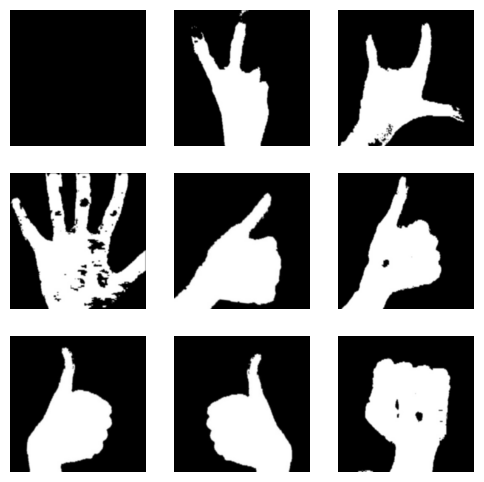

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(6, 6))
axs = axs.flatten()
for i, ax in enumerate(axs):
  ax.axis('off')
  train_image_np = images[i].numpy()
  train_image_np = np.transpose(train_image_np, (1, 2, 0))
  ax.imshow(train_image_np)
plt.show()

In [ ]:
len(dataset.classes) #Всего 6 классов

6

# Feature Extraction

In [ ]:
loss_values = {"AlexNet":{},
               "VGGnet":{},
               "ResNet": {}
}
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
def train_model(model, criterion, optimizer, train_loader, test_loader, epochs=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    train_losses = []
    test_losses = []
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Эпоха {epoch+1}, ошибка на обучении: {running_loss/len(train_loader)}")
        train_losses.append(running_loss/len(train_loader))
        model.eval()
        running_loss = 0.0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                running_loss += loss.item()
        print(f'Ошибка на валидации: {running_loss/len(test_loader)}')
        test_losses.append(running_loss/len(test_loader))
    return train_losses, test_losses

AlexNet

In [ ]:
model = models.alexnet(pretrained=True)
model.classifier[6] = nn.Linear(model.classifier[6].in_features, 6)
for param in model.features.parameters():
    param.requires_grad = False
optimizer = optim.Adam(model.classifier[6].parameters(), lr=0.001)
loss_values["AlexNet"]["Feature extraction"] = train_model(model, criterion, optimizer, train_loader, test_loader)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Эпоха 1, ошибка на обучении: 0.518672093579715
Ошибка на валидации: 0.04560358449816704
Эпоха 2, ошибка на обучении: 0.09071181511337106
Ошибка на валидации: 0.034468308091163635
Эпоха 3, ошибка на обучении: 0.05526023578237404
Ошибка на валидации: 0.027325864881277084
Эпоха 4, ошибка на обучении: 0.04614730856635354
Ошибка на валидации: 0.03941844031214714
Эпоха 5, ошибка на обучении: 0.04251100554723631
Ошибка на валидации: 0.060259174555540085
Эпоха 6, ошибка на обучении: 0.040470595471560955
Ошибка на валидации: 0.014147037640213966
Эпоха 7, ошибка на обучении: 0.03559314874424176
Ошибка на валидации: 0.020775368437170982
Эпоха 8, ошибка на обучении: 0.0268838363699615
Ошибка на валидации: 0.02503262273967266
Эпоха 9, ошибка на обучении: 0.02209117915481329
Ошибка на валидации: 0.01241897139698267
Эпоха 10, ошибка на обучении: 0.022263433868912132
Ошибка на валидации: 0.049686793237924576


VGGnet

In [ ]:
model = models.vgg16(pretrained=True)
model.classifier[6] = nn.Linear(model.classifier[6].in_features, 6)
for param in model.features.parameters():
    param.requires_grad = False
optimizer = optim.Adam(model.classifier[6].parameters(), lr=0.001)
loss_values["VGGnet"]["Feature extraction"] = train_model(model, criterion, optimizer, train_loader, test_loader)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Эпоха 1, ошибка на обучении: 0.8125360621647402
Ошибка на валидации: 0.3442618250846863
Эпоха 2, ошибка на обучении: 0.24583290788260373
Ошибка на валидации: 0.1551852971315384
Эпоха 3, ошибка на обучении: 0.15995239398696207
Ошибка на валидации: 0.10082465410232544
Эпоха 4, ошибка на обучении: 0.1268915974281051
Ошибка на валидации: 0.14602702856063843
Эпоха 5, ошибка на обучении: 0.11175828020681035
Ошибка на валидации: 0.13286776840686798
Эпоха 6, ошибка на обучении: 0.09647649611261758
Ошибка на валидации: 0.08425015211105347
Эпоха 7, ошибка на обучении: 0.08026133223690769
Ошибка на валидации: 0.03180181607604027
Эпоха 8, ошибка на обучении: 0.0808090650561181
Ошибка на валидации: 0.05841793492436409
Эпоха 9, ошибка на обучении: 0.07857733998786319
Ошибка на валидации: 0.16931091248989105
Эпоха 10, ошибка на обучении: 0.06564422646029429
Ошибка на валидации: 0.07970212399959564


ResNet

In [ ]:
model = models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 6)
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)
loss_values["ResNet"]["Feature extraction"] = train_model(model, criterion, optimizer, train_loader, test_loader)

Эпоха 1, ошибка на обучении: 1.2119290828704834
Ошибка на валидации: 0.6975854635238647
Эпоха 2, ошибка на обучении: 0.5471582344987176
Ошибка на валидации: 0.5430980324745178
Эпоха 3, ошибка на обучении: 0.30290463228117337
Ошибка на валидации: 0.2795732021331787
Эпоха 4, ошибка на обучении: 0.21206857128576798
Ошибка на валидации: 0.22335819900035858
Эпоха 5, ошибка на обучении: 0.16845102608203888
Ошибка на валидации: 0.18481554090976715
Эпоха 6, ошибка на обучении: 0.13344837454232303
Ошибка на валидации: 0.20779991149902344
Эпоха 7, ошибка на обучении: 0.11103222688490694
Ошибка на валидации: 0.19580170512199402
Эпоха 8, ошибка на обучении: 0.09148632193153555
Ошибка на валидации: 0.09756326675415039
Эпоха 9, ошибка на обучении: 0.07672206007621506
Ошибка на валидации: 0.04696133732795715
Эпоха 10, ошибка на обучении: 0.06974046711217273
Ошибка на валидации: 0.06591981649398804


# Промежуточные итоги

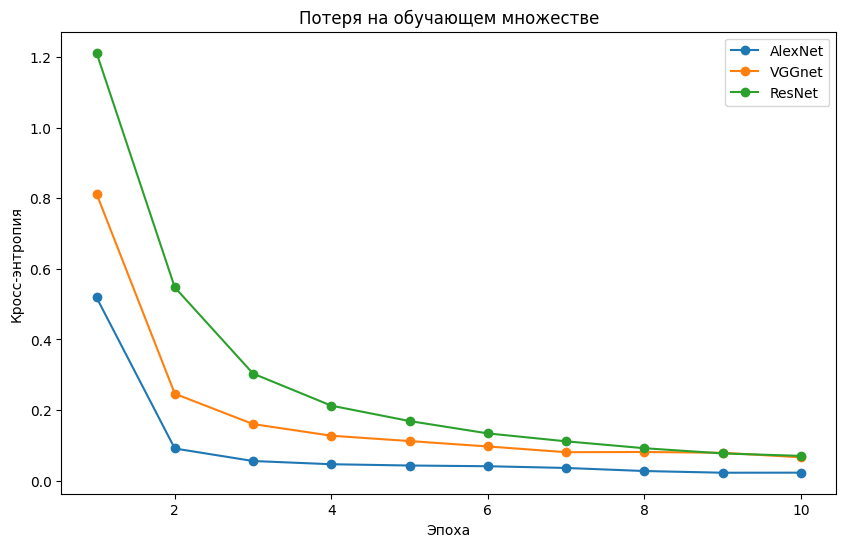

In [ ]:
plt.figure(figsize=(10, 6))
for net in loss_values.keys():
  plt.plot(np.arange(1, 11), loss_values[net]["Feature extraction"][0], label=net, marker='o')
plt.xlabel("Эпоха")
plt.ylabel("Кросс-энтропия")
plt.title("Потеря на обучающем множестве")
plt.legend()
plt.show()

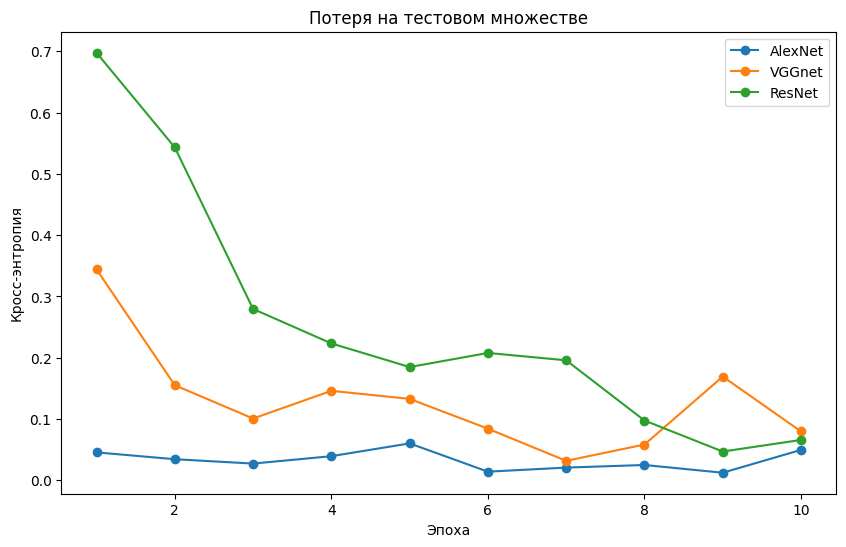

In [ ]:
plt.figure(figsize=(10, 6))
for net in loss_values.keys():
  plt.plot(np.arange(1, 11), loss_values[net]["Feature extraction"][1], label=net, marker='o')
plt.xlabel("Эпоха")
plt.ylabel("Кросс-энтропия")
plt.title("Потеря на тестовом множестве")
plt.legend()
plt.show()

# Fine-tuning

AlexNet

In [ ]:
model = models.alexnet(pretrained=True)
model.classifier[6] = nn.Linear(model.classifier[6].in_features, 6)
optimizer = optim.Adam(model.classifier[6].parameters(), lr=0.001)
loss_values["AlexNet"]["Fine-tuning"] = train_model(model, criterion, optimizer, train_loader, test_loader)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Эпоха 1, ошибка на обучении: 0.5059245740148154
Ошибка на валидации: 0.16030529141426086
Эпоха 2, ошибка на обучении: 0.08497964472255924
Ошибка на валидации: 0.052407048642635345
Эпоха 3, ошибка на обучении: 0.060723735358227386
Ошибка на валидации: 0.09396182745695114
Эпоха 4, ошибка на обучении: 0.0451379454779354
Ошибка на валидации: 0.0374009944498539
Эпоха 5, ошибка на обучении: 0.04013230033557524
Ошибка на валидации: 0.028369728475809097
Эпоха 6, ошибка на обучении: 0.034008612940934574
Ошибка на валидации: 0.016107145696878433
Эпоха 7, ошибка на обучении: 0.02691867227920077
Ошибка на валидации: 0.012059601955115795
Эпоха 8, ошибка на обучении: 0.0265484014949338
Ошибка на валидации: 0.009860099293291569
Эпоха 9, ошибка на обучении: 0.024537922518158502
Ошибка на валидации: 0.03438488394021988
Эпоха 10, ошибка на обучении: 0.024970519229431044
Ошибка на валидации: 0.0189573522657156


VggNet

In [ ]:
model = models.vgg16(pretrained=True)
model.classifier[6] = nn.Linear(model.classifier[6].in_features, 6)
optimizer = optim.Adam(model.classifier[6].parameters(), lr=0.001)
loss_values["VGGnet"]["Fine-tuning"] = train_model(model, criterion, optimizer, train_loader, test_loader)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Эпоха 1, ошибка на обучении: 0.8236534907059236
Ошибка на валидации: 0.32377347350120544
Эпоха 2, ошибка на обучении: 0.24269956147128885
Ошибка на валидации: 0.19697540998458862
Эпоха 3, ошибка на обучении: 0.16486430913209915
Ошибка на валидации: 0.10251474380493164
Эпоха 4, ошибка на обучении: 0.12916336648843504
Ошибка на валидации: 0.15292802453041077
Эпоха 5, ошибка на обучении: 0.11144063181497833
Ошибка на валидации: 0.12569576501846313
Эпоха 6, ошибка на обучении: 0.09764247286048802
Ошибка на валидации: 0.06139960139989853
Эпоха 7, ошибка на обучении: 0.08686216615817764
Ошибка на валидации: 0.04219255596399307
Эпоха 8, ошибка на обучении: 0.07671295749870213
Ошибка на валидации: 0.06806080043315887
Эпоха 9, ошибка на обучении: 0.06813781996342269
Ошибка на валидации: 0.023690659552812576
Эпоха 10, ошибка на обучении: 0.06377447574314746
Ошибка на валидации: 0.02968100644648075


ResNet

In [ ]:
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 6)
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)
loss_values["ResNet"]["Fine-tuning"] = train_model(model, criterion, optimizer, train_loader, test_loader)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Эпоха 1, ошибка на обучении: 1.2622283832593397
Ошибка на валидации: 0.8302536606788635
Эпоха 2, ошибка на обучении: 0.5816196934743361
Ошибка на валидации: 0.4180320203304291
Эпоха 3, ошибка на обучении: 0.3383156277916648
Ошибка на валидации: 0.3155074715614319
Эпоха 4, ошибка на обучении: 0.23087881708687003
Ошибка на валидации: 0.20615345239639282
Эпоха 5, ошибка на обучении: 0.17602497745643964
Ошибка на валидации: 0.11225609481334686
Эпоха 6, ошибка на обучении: 0.1462777517735958
Ошибка на валидации: 0.25929564237594604
Эпоха 7, ошибка на обучении: 0.11136816035617482
Ошибка на валидации: 0.0713224932551384
Эпоха 8, ошибка на обучении: 0.10006480393084613
Ошибка на валидации: 0.06667323410511017
Эпоха 9, ошибка на обучении: 0.08910537578842857
Ошибка на валидации: 0.12617872655391693
Эпоха 10, ошибка на обучении: 0.07772467065263879
Ошибка на валидации: 0.1389961838722229


# Промежуточные итоги

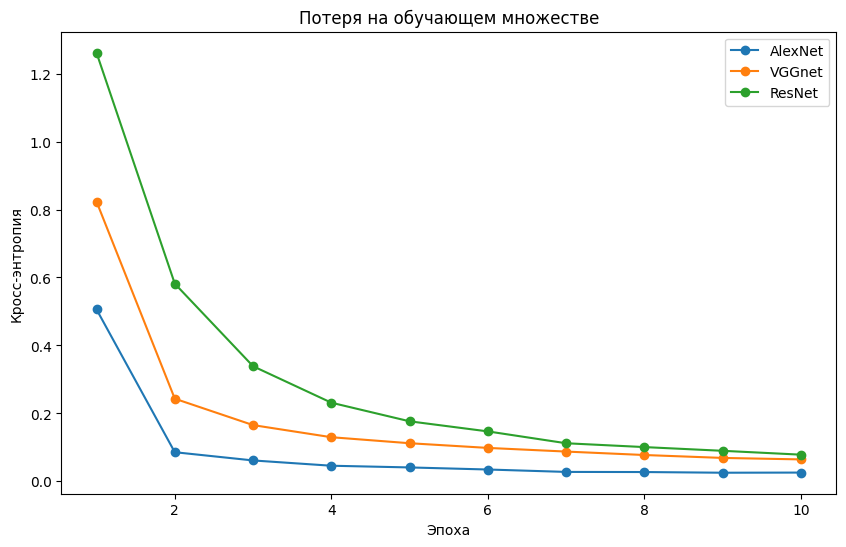

In [ ]:
plt.figure(figsize=(10, 6))
for net in loss_values.keys():
  plt.plot(np.arange(1, 11), loss_values[net]["Fine-tuning"][0], label=net, marker='o')
plt.xlabel("Эпоха")
plt.ylabel("Кросс-энтропия")
plt.title("Потеря на обучающем множестве")
plt.legend()
plt.show()

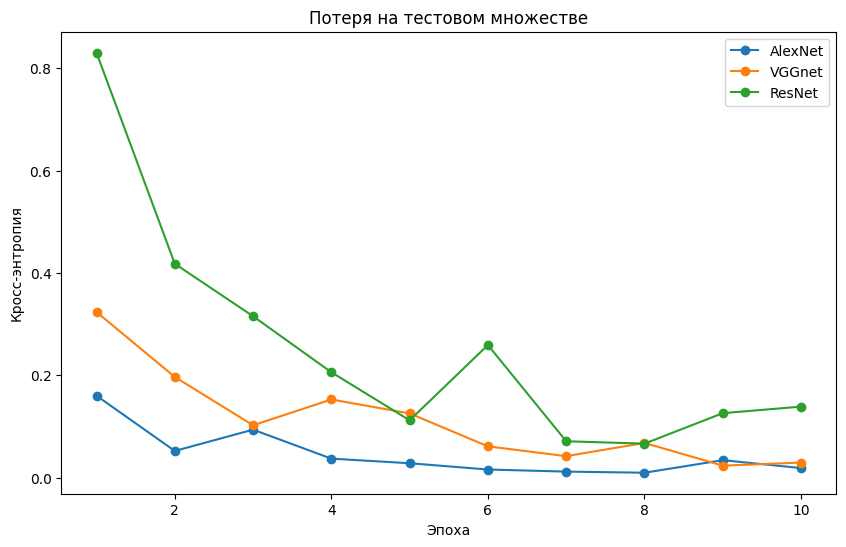

In [ ]:
plt.figure(figsize=(10, 6))
for net in loss_values.keys():
  plt.plot(np.arange(1, 11), loss_values[net]["Fine-tuning"][1], label=net, marker='o')
plt.xlabel("Эпоха")
plt.ylabel("Кросс-энтропия")
plt.title("Потеря на тестовом множестве")
plt.legend()
plt.show()

# Итоги

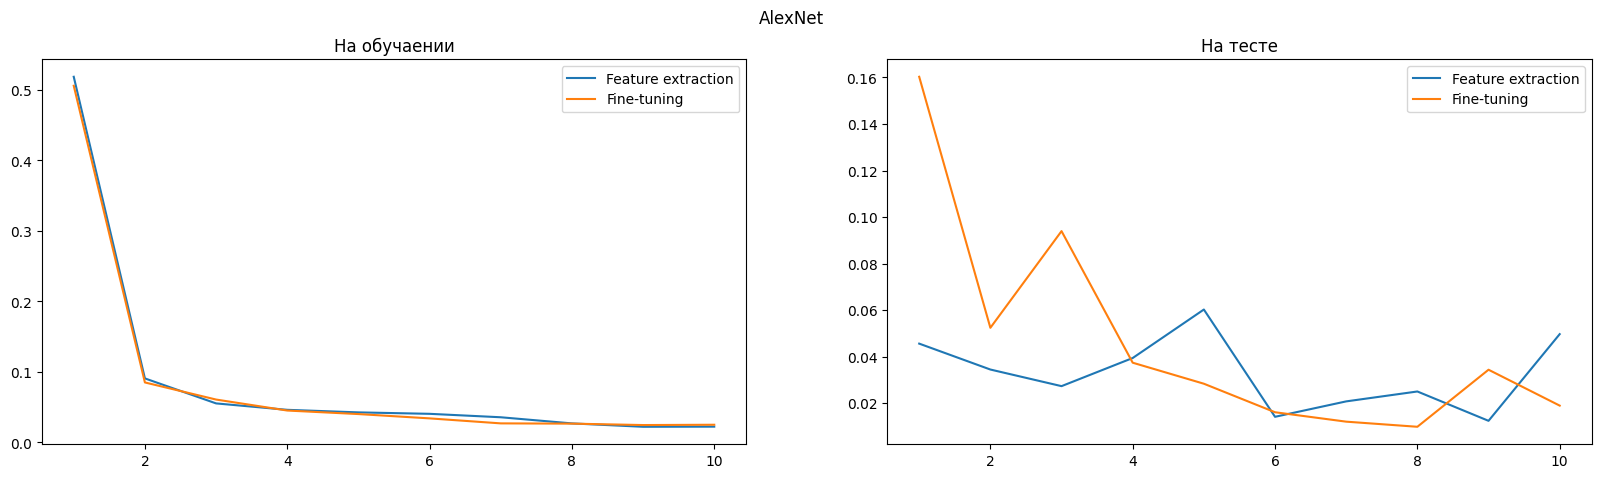

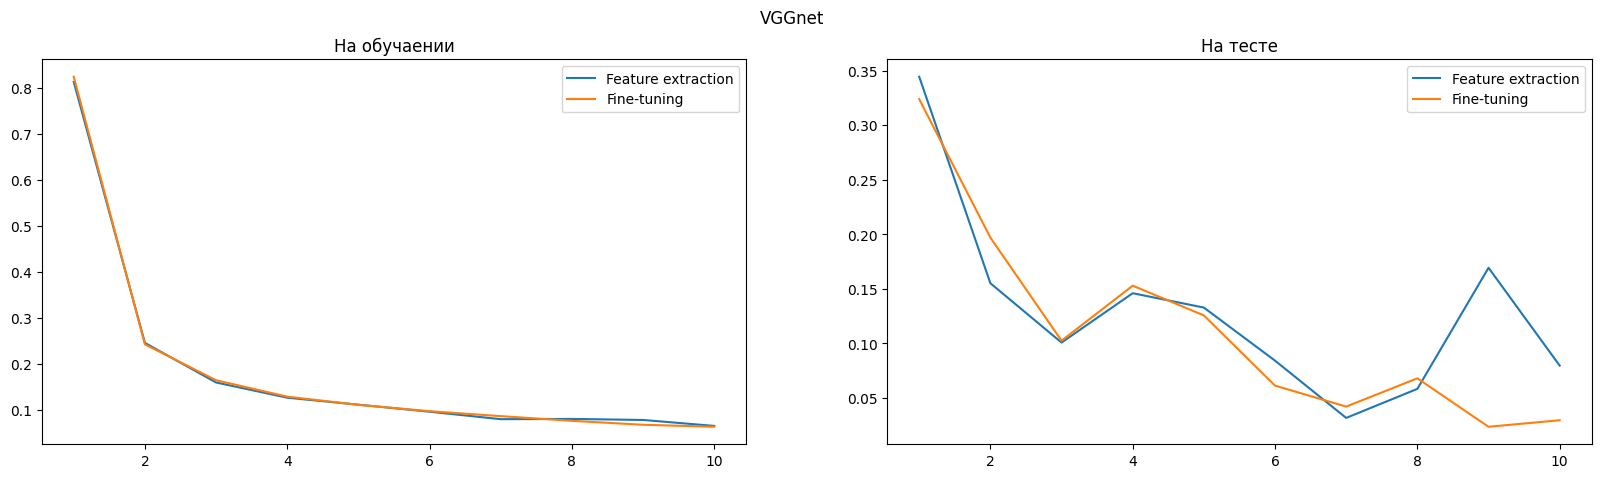

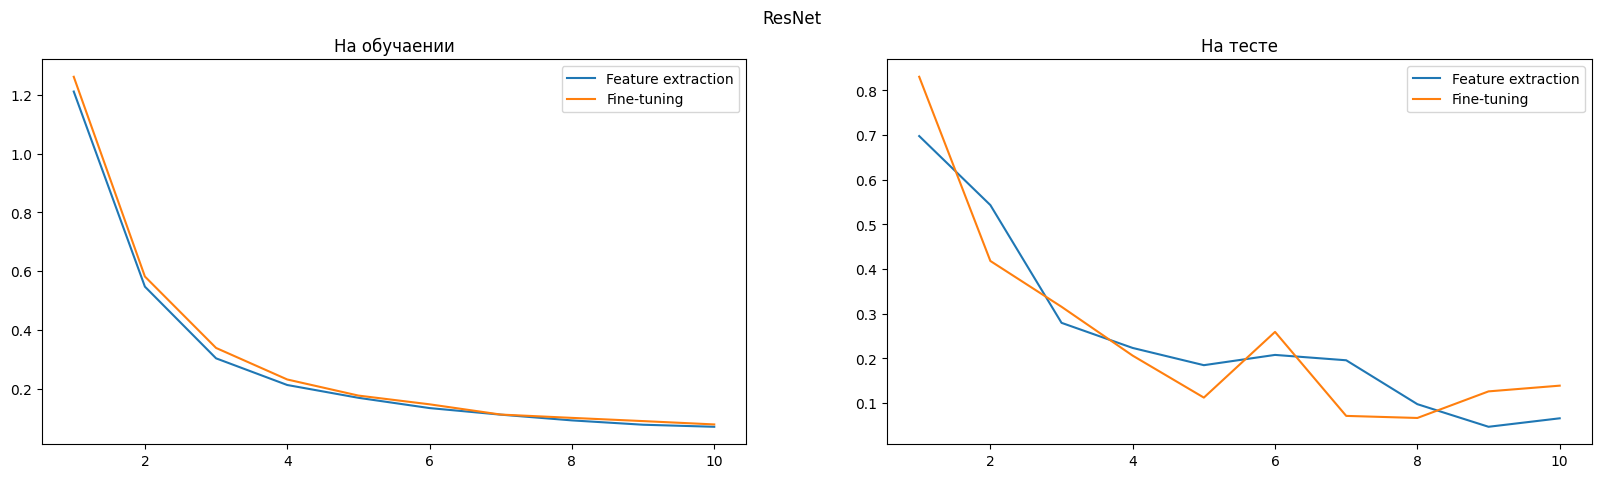

In [ ]:
for net in loss_values.keys():
  fig, axs = plt.subplots(1, 2, figsize=(20, 5))
  axs[0].plot(np.arange(1, 11), loss_values[net]["Feature extraction"][0], label="Feature extraction")
  axs[0].plot(np.arange(1, 11), loss_values[net]["Fine-tuning"][0], label="Fine-tuning")
  axs[0].set_title("На обучаении")
  axs[0].legend()
  axs[1].plot(np.arange(1, 11), loss_values[net]["Feature extraction"][1], label="Feature extraction")
  axs[1].plot(np.arange(1, 11), loss_values[net]["Fine-tuning"][1], label="Fine-tuning")
  axs[1].set_title("На тесте")
  axs[1].legend()
  fig.suptitle(net)
  plt.show()

# plt.figure(figsize=(10, 6))
# for net in loss_values.keys():
#   plt.plot(np.arange(1, 11), loss_values[net]["Fine-tuning"][0], label=net, marker='o')
# plt.xlabel("Эпоха")
# plt.ylabel("Кросс-энтропия")
# plt.title("Потеря на обучающем множестве")
# plt.legend()
# plt.show()